<a href="https://colab.research.google.com/github/conquerv0/Pynaissance/blob/master/1.%20Basic%20Framework/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization Guide
This notebook features data visualization techniques in areas such as static 2D, 3D plotting and interactive 2D plotting using packages `matplotlib, ploly`.

__I. Static 2D Plotting__

In [ ]:
# Import necessary packages and configuration. 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

# Optional for displaying inline
%matplotlib inline 

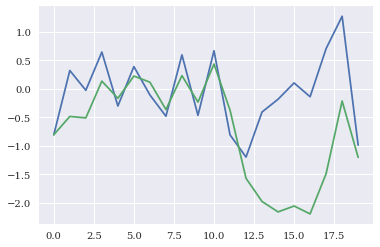

In [ ]:
# Sample data source for plotting
np.random.seed(1000)
y = np.random.standard_normal(20)
x = np.arange(len(y))

# Plotting
plt.plot(x, y)
plt.plot(y.cumsum())

(-0.9500000000000001, 19.95, -2.322818663749045, 0.5655085808655865)

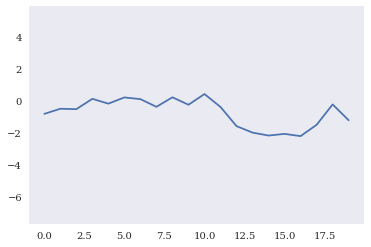

In [ ]:
# Some modification to plotting: Turning off the grid and create equal scalling for the two axes.  
plt.plot(y.cumsum())
plt.grid(False)
plt.axis('equal')

Some options for `plt.axis()`

Parameter | Description
------------ | -------------
Empty | Returns current axis limit
off | Turns axis lines and labels off
equal | Leads to equal scalling
scaled | Produces equal scaling via dimension changes
tight | Makes all data visible(tighten limits)
image | Makes all data visible(with data limits)
[xmin, xmax, ymin, ymax] | Sets limits to given list of values


No handles with labels found to put in legend.


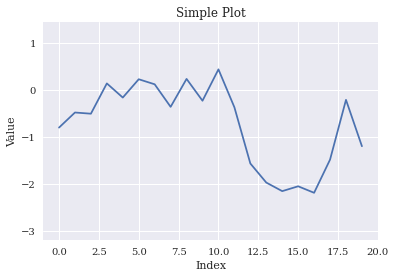

In [ ]:
plt.plot(y.cumsum())
plt.xlim(-1, 20)
plt.ylim(np.min(y.cumsum())-1, 
         np.max(y.cumsum()) + 1)

# Add labelling in the plot for Readability
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Simple Plot')
plt.legend(loc=0)

Creating mutilple plots on one line

Text(0.5, 1.0, '2nd Data Set')

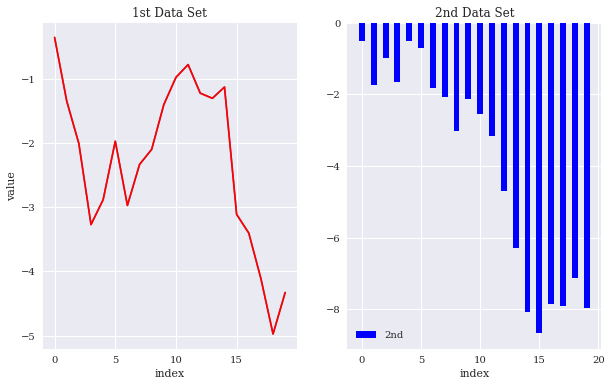

In [ ]:
y = np.random.standard_normal((20, 2)).cumsum(axis=0)

plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'r')
plt.xlabel('index')
plt.ylabel('value')
plt.title('1st Data Set')

# Second plot
plt.subplot(122)
plt.bar(np.arange(len(y)), y[:,1], width=0.5, color='b', label='2nd')
plt.legend(loc=0)
plt.xlabel('index')
plt.title('2nd Data Set')

__Other Plotting Style__


Text(0.5, 1.0, 'Scatter Plot')

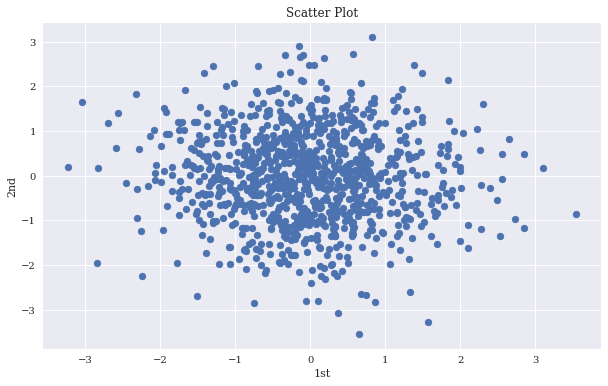

In [ ]:
# Regular Scatter plot
y = np.random.standard_normal((1000, 2))
plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], marker='o')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot with Color Map')

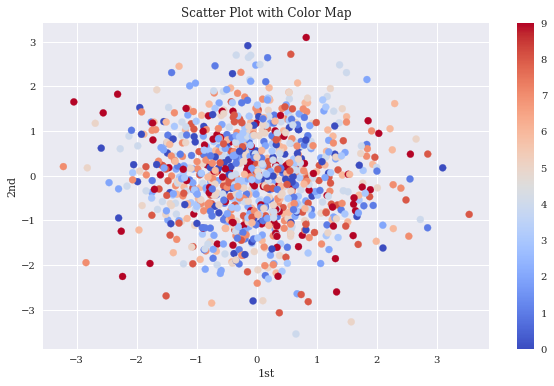

In [ ]:
# Integrate Color map to Scatter plot
c = np.random.randint(0, 10, len(y))
plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], c=c, cmap='coolwarm', marker='o') # Define the dot to be marked as a bigger dot
plt.colorbar()
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot with Color Map')

Text(0.5, 1.0, 'Histogram')

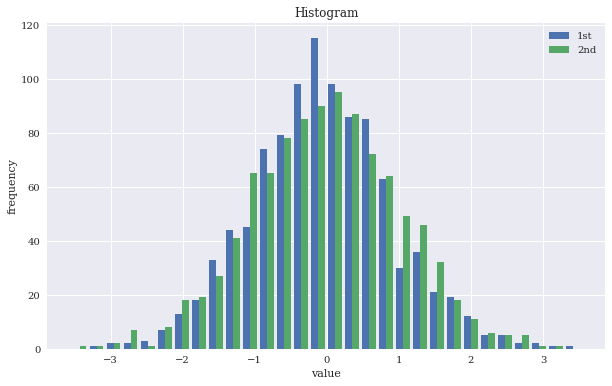

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], bins=30)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

Text(0.5, 1.0, 'Boxplot')

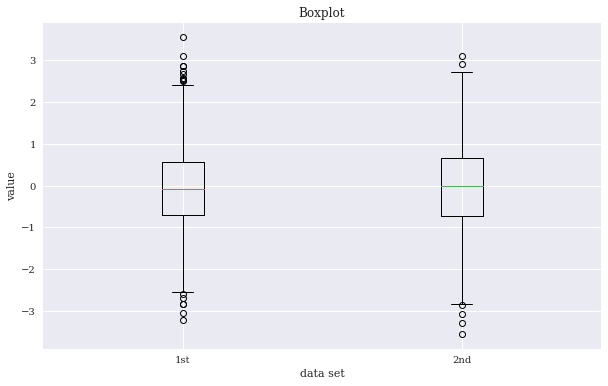

In [ ]:
# Boxplot
fig, ax = plt.subplots(figsize=(10, 6))
plt.boxplot(y)
plt.setp(ax, xticklabels=['1st', '2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot')

[Text(0, 0, '$f(a)$'), Text(0, 0, '$f(b)$')]

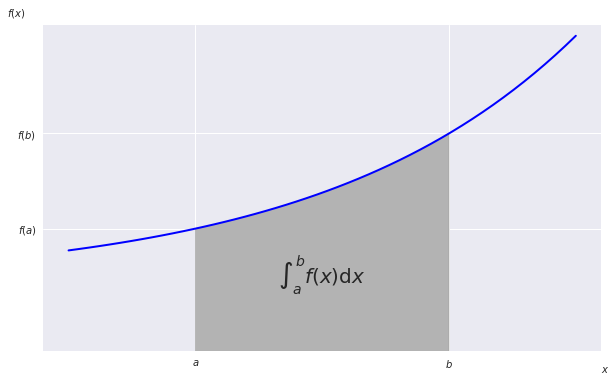

In [ ]:
# Plotting of mathematical function

def func(x):
    return 0.5*np.exp(x)+1
a, b = 0.5, 1.5
x = np.linspace(0, 2)
y = func(x)
Ix = np.linspace(a, b) # Integral limits of x value
Iy = func(Ix) # Integral limits of y value
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]

# 
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)

poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5 * (a+b), 1, r'$\int_a^b f(x)\mathrm{d}x$',
         horizontalalignment='center', fontsize=20) # Labelling for plot

plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([func(a), func(b)])
ax.set_yticklabels(('$f(a)$', '$f(b)$'))

__II. Static 3D Plotting__

Using `np.meshgrid()` function to generate a two-dimensional coordinates system out of two one-dimensional ndarray. 

In [ ]:
# Set a call option data values with
# Strike values = [50, 150]
# Time-to-Maturity = [0.5, 2.5]

strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)

strike, ttm = np.meshgrid(strike, ttm)
strike[:2].round(2)

# Calculate implied volatility
iv = (strike - 100) ** 2 / (100 * strike) / ttm
iv[:5, :3]

array([[1.        , 0.76695652, 0.58132045],
       [0.85185185, 0.65333333, 0.4951989 ],
       [0.74193548, 0.56903226, 0.43130227],
       [0.65714286, 0.504     , 0.38201058],
       [0.58974359, 0.45230769, 0.34283001]])

Plotting a 3D figure using the generated Call options data with `Axes3D`

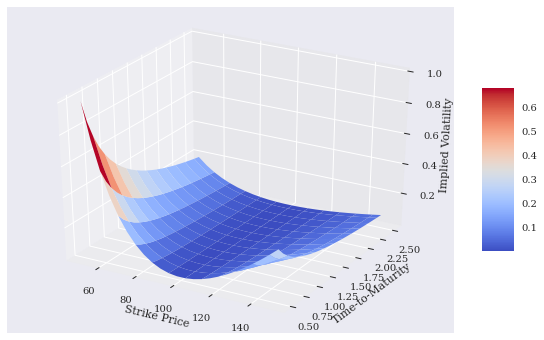

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, 
                       cmap = plt.cm.coolwarm, linewidth = 0.5, antialiased=True)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Implied Volatility')
fig.colorbar(surf, shrink = 0.5, aspect =5)